###*Sayantan Mukherjee 60009220131 D2-2*

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz

In [ ]:
def fuzzy_union(set_a, set_b):
    return np.fmax(set_a, set_b)

In [ ]:
def fuzzy_intersection(set_a, set_b):
    return np.fmin(set_a, set_b)

In [ ]:
def fuzzy_complement(fuzzy_set):
    return 1 - fuzzy_set

In [ ]:
def fuzzy_algebraic_product(set_a, set_b):
    return np.multiply(set_a, set_b)

In [ ]:
def fuzzy_algebraic_sum(set_a, set_b):
    return set_a + set_b - np.multiply(set_a, set_b)

In [ ]:
def fuzzy_bounded_sum(set_a, set_b):
    return np.minimum(set_a + set_b, 1)

In [ ]:
def fuzzy_bounded_difference(set_a, set_b):
    return np.maximum(set_a - set_b, 0)

In [ ]:
def fuzzy_cartesian_product(set_a, set_b):
    result = np.zeros((len(set_a), len(set_b)))
    for i in range(len(set_a)):
        for j in range(len(set_b)):
            result[i, j] = np.minimum(set_a[i], set_b[j])
    return result

In [ ]:
set_a = np.array([0.2, 0.5, 0.8, 0.9])
set_b = np.array([0.6, 0.7, 0.4, 0.3])

In [ ]:
#Results

union_result = fuzzy_union(set_a, set_b)
print("Union:", union_result)

intersection_result = fuzzy_intersection(set_a, set_b)
print("Intersection:", intersection_result)

complement_result = fuzzy_complement(set_a)
print("Complement of A:", complement_result)

product_result = fuzzy_algebraic_product(set_a, set_b)
print("Algebraic Product:", product_result)

sum_result = fuzzy_algebraic_sum(set_a, set_b)
print("Algebraic Sum:", sum_result)

bounded_sum_result = fuzzy_bounded_sum(set_a, set_b)
print("Bounded Sum:", bounded_sum_result)

bounded_diff_result = fuzzy_bounded_difference(set_a, set_b)
print("Bounded Difference:", bounded_diff_result)

cartesian_product_result = fuzzy_cartesian_product(set_a, set_b)
print("Cartesian Product:\n", cartesian_product_result)

Union: [0.6 0.7 0.8 0.9]
Intersection: [0.2 0.5 0.4 0.3]
Complement of A: [0.8 0.5 0.2 0.1]
Algebraic Product: [0.12 0.35 0.32 0.27]
Algebraic Sum: [0.68 0.85 0.88 0.93]
Bounded Sum: [0.8 1.  1.  1. ]
Bounded Difference: [0.  0.  0.4 0.6]
Cartesian Product:
 [[0.2 0.2 0.2 0.2]
 [0.5 0.5 0.4 0.3]
 [0.6 0.7 0.4 0.3]
 [0.6 0.7 0.4 0.3]]


In [ ]:
import matplotlib.pyplot as plt

laptops = ['MacBook', 'Dell XPS', 'HP Pavilion', 'Lenovo ThinkPad', 'Acer']
coolness_values = [1, 0.9, 0.8, 0.7, 0.4]

plt.figure(figsize=(8, 6))
plt.bar(laptops, coolness_values, color=['gray', 'blue', 'green', 'black', 'orange'])

plt.title('Fuzzy Set Representation of Laptop Brand Coolness', fontsize=14)
plt.xlabel('Laptops', fontsize=12)
plt.ylabel('Coolness Factor', fontsize=12)

plt.ylim(0, 1.1)

# Add gridlines to the y-axis for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [ ]:
# Coolness factor of laptops in a Café environment
set_a = np.array([1, 0.9, 0.8, 0.7, 0.4])

# Coolness factor of laptops in a Workplace environment
set_b = np.array([0.8, 1, 0.7, 0.9, 0.5])

union_result = fuzzy_union(set_a, set_b)
intersection_result = fuzzy_intersection(set_a, set_b)
complement_set_a = fuzzy_complement(set_a)
complement_set_b = fuzzy_complement(set_b)

print("Set A (Café Coolness):", set_a)
print("Set B (Workplace Coolness):", set_b)
print("Union:", union_result)
print("Intersection:", intersection_result)
print("Complement of Set A:", complement_set_a)
print("Complement of Set B:", complement_set_b)

Set A (Café Coolness): [1.  0.9 0.8 0.7 0.4]
Set B (Workplace Coolness): [0.8 1.  0.7 0.9 0.5]
Union: [1.  1.  0.8 0.9 0.5]
Intersection: [0.8 0.9 0.7 0.7 0.4]
Complement of Set A: [0.  0.1 0.2 0.3 0.6]
Complement of Set B: [0.2 0.  0.3 0.1 0.5]


Fuzzified inputs (Dirt):
  Low: 0.00
  Medium: 0.00
  High: 0.50

Fuzzified inputs (Grease):
  Low: 0.00
  Medium: 0.00
  High: 1.00

Fuzzified output (Wash Time):
  Very_short: 0.00
  Short: 0.00
  Medium: 0.00
  Long: 0.00
  Very_long: 1.00

Wash Time (Defuzzified): 55.60 minutes


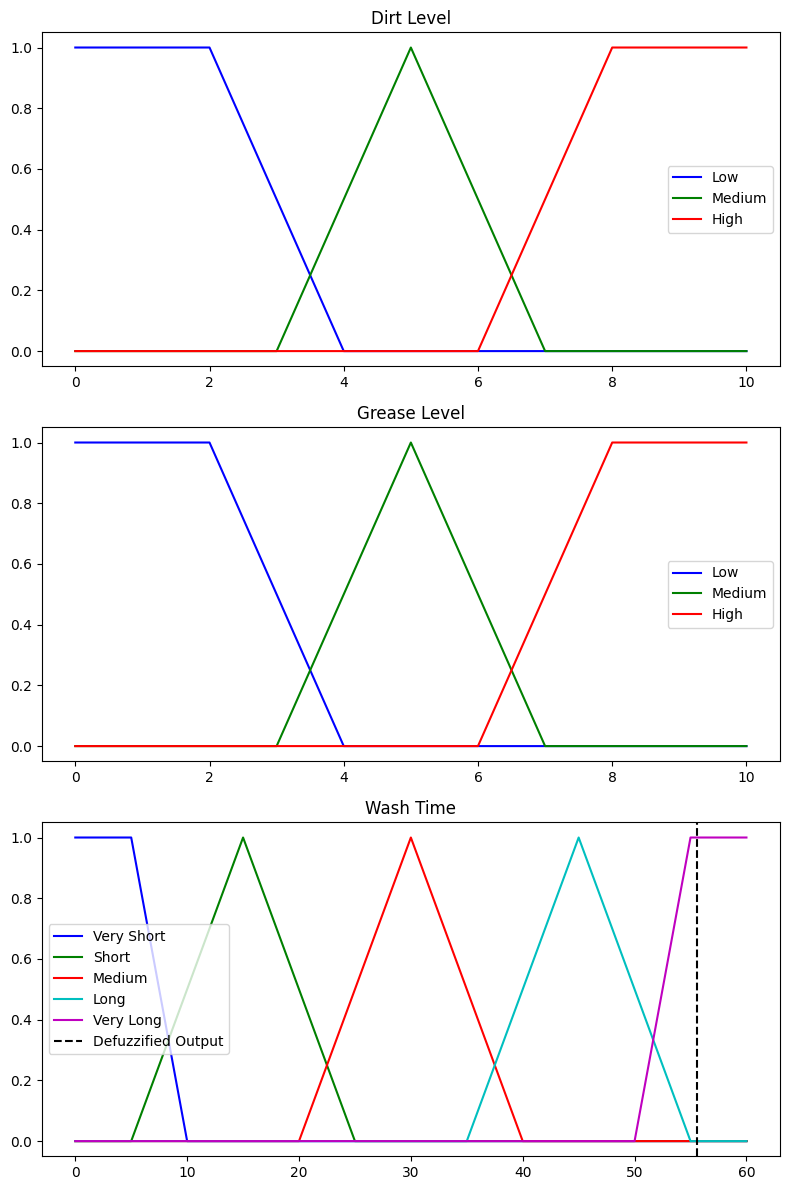

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
dirt = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt')
grease = ctrl.Antecedent(np.arange(0, 11, 1), 'grease')
wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')

# Membership functions for dirt level
dirt['low'] = fuzz.trapmf(dirt.universe, [0, 0, 2, 4])
dirt['medium'] = fuzz.trimf(dirt.universe, [3, 5, 7])
dirt['high'] = fuzz.trapmf(dirt.universe, [6, 8, 10, 10])

# Membership functions for grease level
grease['low'] = fuzz.trapmf(grease.universe, [0, 0, 2, 4])
grease['medium'] = fuzz.trimf(grease.universe, [3, 5, 7])
grease['high'] = fuzz.trapmf(grease.universe, [6, 8, 10, 10])

# Membership functions for wash time
wash_time['very_short'] = fuzz.trapmf(wash_time.universe, [0, 0, 5, 10])
wash_time['short'] = fuzz.trimf(wash_time.universe, [5, 15, 25])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [20, 30, 40])
wash_time['long'] = fuzz.trimf(wash_time.universe, [35, 45, 55])
wash_time['very_long'] = fuzz.trapmf(wash_time.universe, [50, 55, 60, 60])

# Define fuzzy rules
rule1 = ctrl.Rule(dirt['low'] & grease['low'], wash_time['very_short'])
rule2 = ctrl.Rule(dirt['low'] & grease['medium'], wash_time['short'])
rule3 = ctrl.Rule(dirt['low'] & grease['high'], wash_time['medium'])

rule4 = ctrl.Rule(dirt['medium'] & grease['low'], wash_time['short'])
rule5 = ctrl.Rule(dirt['medium'] & grease['medium'], wash_time['medium'])
rule6 = ctrl.Rule(dirt['medium'] & grease['high'], wash_time['long'])

rule7 = ctrl.Rule(dirt['high'] & grease['low'], wash_time['medium'])
rule8 = ctrl.Rule(dirt['high'] & grease['medium'], wash_time['long'])
rule9 = ctrl.Rule(dirt['high'] & grease['high'], wash_time['very_long'])

# Control system and simulation
wash_time_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
wash_time_sim = ctrl.ControlSystemSimulation(wash_time_ctrl)

# Inputs: dirt level and grease
wash_time_sim.input['dirt'] = 7  # medium-high dirt level
wash_time_sim.input['grease'] = 8  # high grease level

# Fuzzified input values
dirt_levels = dirt.terms
grease_levels = grease.terms

print("Fuzzified inputs (Dirt):")
for level in dirt_levels:
    print(f"  {level.capitalize()}: {fuzz.interp_membership(dirt.universe, dirt[level].mf, 7):.2f}")

print("\nFuzzified inputs (Grease):")
for level in grease_levels:
    print(f"  {level.capitalize()}: {fuzz.interp_membership(grease.universe, grease[level].mf, 8):.2f}")

# Compute the wash time
wash_time_sim.compute()

wash_time_fuzzy_output = wash_time_sim.output['wash_time']
wash_time_levels = wash_time.terms

print("\nFuzzified output (Wash Time):")
for term_name in wash_time_levels:
    membership_value = fuzz.interp_membership(wash_time.universe, wash_time[term_name].mf, wash_time_fuzzy_output)
    print(f"  {term_name.capitalize()}: {membership_value:.2f}")

# Defuzzified wash time
defuzzified_wash_time = wash_time_sim.output['wash_time']
print(f"\nWash Time (Defuzzified): {defuzzified_wash_time:.2f} minutes")

# Plotting the membership functions and results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 12))

# Plot for dirt level
ax1.plot(dirt.universe, dirt['low'].mf, 'b', label='Low')
ax1.plot(dirt.universe, dirt['medium'].mf, 'g', label='Medium')
ax1.plot(dirt.universe, dirt['high'].mf, 'r', label='High')
ax1.set_title('Dirt Level')
ax1.legend()

# Plot for grease level
ax2.plot(grease.universe, grease['low'].mf, 'b', label='Low')
ax2.plot(grease.universe, grease['medium'].mf, 'g', label='Medium')
ax2.plot(grease.universe, grease['high'].mf, 'r', label='High')
ax2.set_title('Grease Level')
ax2.legend()

# Plot for wash time
ax3.plot(wash_time.universe, wash_time['very_short'].mf, 'b', label='Very Short')
ax3.plot(wash_time.universe, wash_time['short'].mf, 'g', label='Short')
ax3.plot(wash_time.universe, wash_time['medium'].mf, 'r', label='Medium')
ax3.plot(wash_time.universe, wash_time['long'].mf, 'c', label='Long')
ax3.plot(wash_time.universe, wash_time['very_long'].mf, 'm', label='Very Long')
ax3.axvline(x=defuzzified_wash_time, color='k', linestyle='--', label='Defuzzified Output')
ax3.set_title('Wash Time')
ax3.legend()

plt.tight_layout()
plt.show()


<ipython-input-20-528c98af62ee>:10: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))
<ipython-input-20-528c98af62ee>:10: RuntimeWarning: invalid value encountered in divide
  return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))


Defuzzified wash time: 0.79


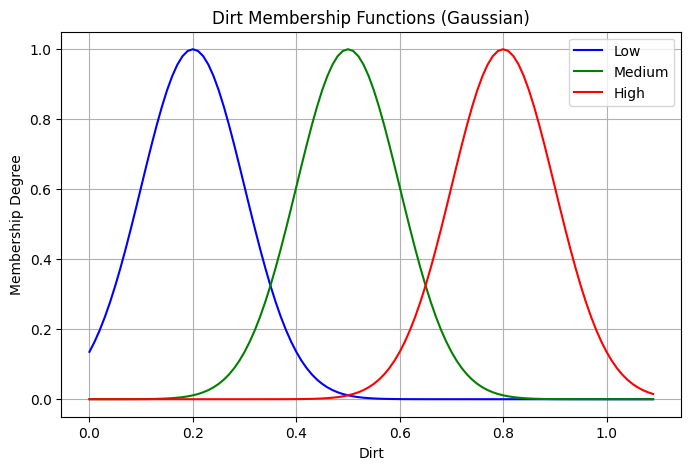

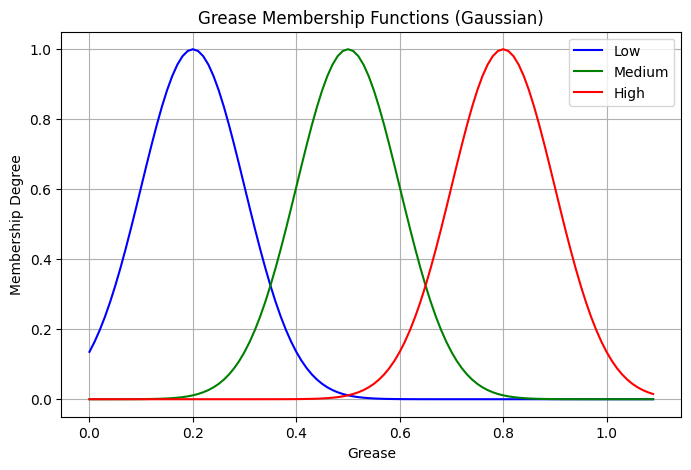

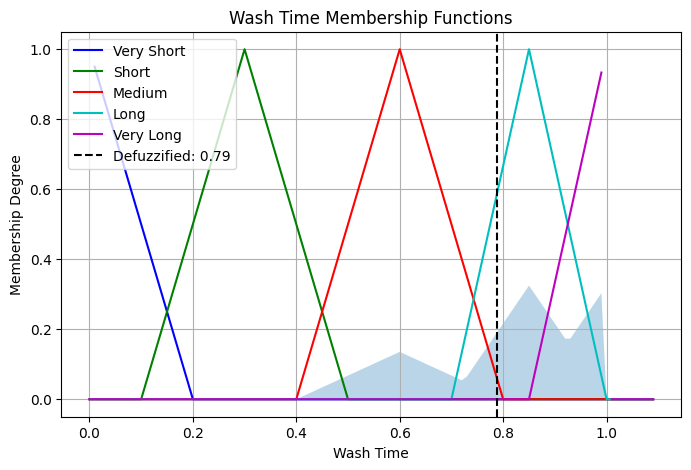

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian membership functions
def gaussmf(x, mean, sigma):
    return np.exp(-np.square(x - mean) / (2 * np.square(sigma)))

# Triangular membership function
def trimf(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Membership functions for dirt and grease levels
x_dirt = np.arange(0, 1.1, 0.01)
x_grease = np.arange(0, 1.1, 0.01)
x_wash_time = np.arange(0, 1.1, 0.01)

dirt_low = gaussmf(x_dirt, 0.2, 0.1)
dirt_medium = gaussmf(x_dirt, 0.5, 0.1)
dirt_high = gaussmf(x_dirt, 0.8, 0.1)

grease_low = gaussmf(x_grease, 0.2, 0.1)
grease_medium = gaussmf(x_grease, 0.5, 0.1)
grease_high = gaussmf(x_grease, 0.8, 0.1)

# Wash time membership functions using trapezoidal and triangular
wash_time_very_short = trimf(x_wash_time, 0, 0, 0.2)
wash_time_short = trimf(x_wash_time, 0.1, 0.3, 0.5)
wash_time_medium = trimf(x_wash_time, 0.4, 0.6, 0.8)
wash_time_long = trimf(x_wash_time, 0.7, 0.85, 1)
wash_time_very_long = trimf(x_wash_time, 0.85, 1, 1)

# Fuzzification for dirt and grease
def fuzzify_dirt(dirt_level):
    return {
        'low': np.interp(dirt_level, x_dirt, dirt_low),
        'medium': np.interp(dirt_level, x_dirt, dirt_medium),
        'high': np.interp(dirt_level, x_dirt, dirt_high)
    }

def fuzzify_grease(grease_level):
    return {
        'low': np.interp(grease_level, x_grease, grease_low),
        'medium': np.interp(grease_level, x_grease, grease_medium),
        'high': np.interp(grease_level, x_grease, grease_high)
    }

# Inference: Combining rules for dirt and grease
def infer_wash_time(dirt_fuzz, grease_fuzz):
    rule1 = min(dirt_fuzz['low'], grease_fuzz['low'])
    rule2 = min(dirt_fuzz['low'], grease_fuzz['medium'])
    rule3 = min(dirt_fuzz['low'], grease_fuzz['high'])
    rule4 = min(dirt_fuzz['medium'], grease_fuzz['low'])
    rule5 = min(dirt_fuzz['medium'], grease_fuzz['medium'])
    rule6 = min(dirt_fuzz['medium'], grease_fuzz['high'])
    rule7 = min(dirt_fuzz['high'], grease_fuzz['low'])
    rule8 = min(dirt_fuzz['high'], grease_fuzz['medium'])
    rule9 = min(dirt_fuzz['high'], grease_fuzz['high'])

    wash_time_agg = np.fmax(
        np.fmax(np.fmax(rule1 * wash_time_very_short, rule2 * wash_time_short), np.fmax(rule3 * wash_time_medium, rule4 * wash_time_short)),
        np.fmax(np.fmax(rule5 * wash_time_medium, rule6 * wash_time_long), np.fmax(rule7 * wash_time_medium, np.fmax(rule8 * wash_time_long, rule9 * wash_time_very_long)))
    )

    return wash_time_agg

# Defuzzification method (Centroid)
def defuzzify(x, mf):
    return np.sum(x * mf) / np.sum(mf)

# Input dirt and grease levels
dirt_level = 0.7
grease_level = 0.65

# Fuzzify inputs
dirt_fuzz = fuzzify_dirt(dirt_level)
grease_fuzz = fuzzify_grease(grease_level)

# Apply fuzzy inference to get wash time
wash_time_fuzzy = infer_wash_time(dirt_fuzz, grease_fuzz)

# Defuzzify to get a single wash time output
wash_time_defuzzified = defuzzify(x_wash_time, wash_time_fuzzy)

print(f"Defuzzified wash time: {wash_time_defuzzified:.2f}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(x_dirt, dirt_low, label='Low', color='b')
plt.plot(x_dirt, dirt_medium, label='Medium', color='g')
plt.plot(x_dirt, dirt_high, label='High', color='r')
plt.title('Dirt Membership Functions (Gaussian)')
plt.xlabel('Dirt')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(x_grease, grease_low, label='Low', color='b')
plt.plot(x_grease, grease_medium, label='Medium', color='g')
plt.plot(x_grease, grease_high, label='High', color='r')
plt.title('Grease Membership Functions (Gaussian)')
plt.xlabel('Grease')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(x_wash_time, wash_time_very_short, label='Very Short', color='b')
plt.plot(x_wash_time, wash_time_short, label='Short', color='g')
plt.plot(x_wash_time, wash_time_medium, label='Medium', color='r')
plt.plot(x_wash_time, wash_time_long, label='Long', color='c')
plt.plot(x_wash_time, wash_time_very_long, label='Very Long', color='m')

plt.fill_between(x_wash_time, 0, wash_time_fuzzy, alpha=0.3)
plt.axvline(x=wash_time_defuzzified, color='k', linestyle='--', label=f'Defuzzified: {wash_time_defuzzified:.2f}')

plt.title('Wash Time Membership Functions')
plt.xlabel('Wash Time')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()


###*Conclusion:*

*Fuzzy logic allows us to handle imprecise or vague inputs, making it ideal for systems where conditions are not strictly binary (e.g., "dirty" or "clean"). It mimics human reasoning by allowing for partial membership in categories, which is perfect for real-world, complex decision-making processes.*


*In this assignment, The principles of fuzzy logic were explored by implementing a system that determines wash time based on dirt and grease levels.inputs were fuzzified, applied fuzzy rules and defuzzified the output, demonstrating how fuzzy logic handles uncertainty and partial truths effectively.*